## Imports

In [1]:
import os, glob
os.chdir('..') 
PROJ_DIR = os.getcwd()
print(PROJ_DIR)
from collections import defaultdict, Counter
import pandas as pd
from IPython.display import HTML
import hate_datasets as dc
import kg_adaptation as kg_adapt
import identity_group_identification as model_f
from functions.helper import get_metrics, sample_error_partition, sample_true_partition
from functions.helper import entities_in_categories, find_elbow

dnames = ['xtremespeech', 'gabhatecorpus', 'hatexplain']
id_col, text_col = 'comment_id', 'predict_text'
# Evaluation variables
models_folder = os.path.join(PROJ_DIR, 'models')
error_entity_folder = os.path.join(PROJ_DIR, 'interpretations')
# Limit GPU device: CPU 0, GPU 1 or 2
model_f.select_device(device_id="0", device_type='CPU')
# model_f.select_device(device_id="1", device_type='GPU')

/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities
Number of CPU available: 1
Set visible PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


## Train and export hybrid and transformer based models

In [ ]:
! bash notebooks/train_models.sh

In [2]:
# Reproduce experiments from experiment pickle file: cross-validation
exp_files = sorted(glob.glob(os.path.join(models_folder, '*/*/*/exp_file.pkl')))
print(f' Cross-validation: {len(exp_files)} models')

 Cross-validation: 7 models


In [3]:
# Import hybrid, transformers, lexical models: out-of-domain evaluation
# use with predict function
models = []
# ... lexical
lexicon_path = os.path.join(PROJ_DIR, 'baselines', 'Toxic_Debias', 'word_based_bias_list_pruned.csv')
models.append(model_f.toxic_debias_load(lexicon_path=lexicon_path))
# ... hybrid (hierarchical)
hybrid_models = sorted(glob.glob(os.path.join(models_folder, 'hybrid/gso*/*hierarchical*')))
models += [model_f.model_load(hybrid_model) for hybrid_model in hybrid_models]
# ... transformers
transformer_model = sorted(glob.glob(os.path.join(models_folder, 'llm/gso*/roberta-base')))[0]
models.append(model_f.model_load(transformer_model))

print(f' Out-of-domain evaluation: {len(models)} models')

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


 Out-of-domain evaluation: 5 models


## Evaluation

Overall loss: 0.6637
Label loss: nan
Accuracy by chance: 1.2640
Log-odds difference: 0.5411
ROC AUC: 0.8638
PR AUC: 0.8573
F1-score: 0.5063
Precision: 0.8434
Recall: 0.4310
Overall loss: 0.4800
Label loss: nan
Accuracy by chance: 1.6201
Log-odds difference: 1.432
ROC AUC: 0.9010
PR AUC: 0.8953
F1-score: 0.7814
Precision: 0.8819
Recall: 0.7042
Overall loss: 0.3702
Label loss: nan
Accuracy by chance: 1.7330
Log-odds difference: 1.825
ROC AUC: 0.9256
PR AUC: 0.9269
F1-score: 0.8488
Precision: 0.8945
Recall: 0.8075


/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/venv2/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/venv2/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/baselines/t

Overall loss: 0.6683
Label loss: nan
Accuracy by chance: 1.2877
Log-odds difference: 0.6047
ROC AUC: 0.8302
PR AUC: 0.8255
F1-score: 0.5056
Precision: 0.8506
Recall: 0.4007
Overall loss: 0.4838
Label loss: nan
Accuracy by chance: 1.5866
Log-odds difference: 1.331
ROC AUC: 0.8956
PR AUC: 0.8935
F1-score: 0.7574
Precision: 0.8788
Recall: 0.6679
Overall loss: 0.3671
Label loss: nan
Accuracy by chance: 1.7335
Log-odds difference: 1.828
ROC AUC: 0.9260
PR AUC: 0.9277
F1-score: 0.8496
Precision: 0.8949
Recall: 0.8087


/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/venv2/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/venv2/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/baselines/t

Overall loss: 0.2068
Label loss: nan
Accuracy by chance: 1.8578
Log-odds difference: 2.476
ROC AUC: 0.9770
PR AUC: 0.9772
F1-score: 0.9161
Precision: 0.9367
Recall: 0.8963


/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/venv2/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


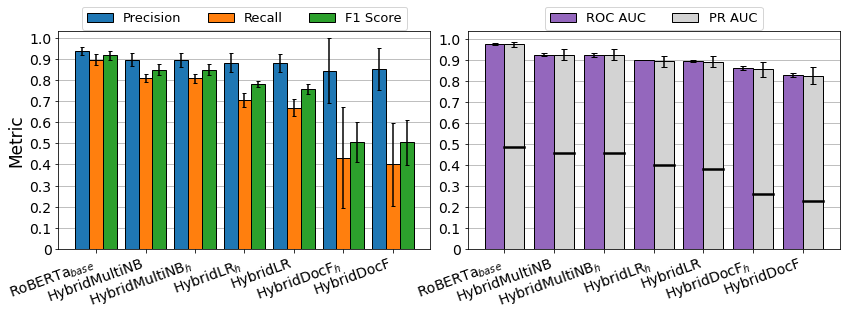

In [4]:
# 1. Cross-validation results: all with stem
model_names_cv = [r'HybridDocF$_{h}$', 
                  r'HybridLR$_{h}$', 
                  r'HybridMultiNB$_{h}$', 
                  r'HybridDocF', 
                  r'HybridLR', 
                  r'HybridMultiNB', 
                  r'RoBERTa$_{base}$']

model_f.plot_cv_from_exp_files(exp_files, 'target_gso', model_names_cv, models_folder)

In [5]:
# 2. Out-of-domain evaluation
model_names = ['Toxic_Debias', r'HybridDocF$_{h}$', r'HybridLR$_{h}$', r'HybridMultiNB$_{h}$', r'RoBERTa$_{base}$']
identity_col = 'target_gso'
performance, datasets = defaultdict(lambda: defaultdict(dict)), {}
for dname in ['gabhatecorpus', 'xtremespeech', 'hatexplain']:
    print(f'\n{dname.upper()}')
    df, text_col0, id_col0, identities_dict = dc.import_dataset(dname)
    data, target_cols, text_col, id_col = dc.prepare_for_model_evaluation(
        df, text_col0, id_col0, identities_dict
    )
    if dname == 'xtremespeech':
        # Include only texts in English
        data = data.loc[data['Language'] == 'English'].reset_index(drop=True).copy()
        print(f'... {data.shape[0]} english texts.')
    # use model_predict for hybrid and transformers, and lexical-based functions.
    for model_name, model in zip(model_names, models):
        print(model_name)
        if model_name == 'Toxic_Debias':
            y_trues = data[identity_col].values
            y_preds, matches = model_f.toxic_debias_predict(model, data, text_col)
            metrics = {m: v[0] for m, v in get_metrics([y_trues], [y_preds], [y_preds]).items()}
            performance[dname][model_name] =  metrics
            data[f'{model_name}_y_trues'] = y_trues
            data[f'{model_name}_y_preds'] = y_preds
            data[f'{model_name}_matches'] = matches
        else:
            y_trues, y_preds, interpretations = model_f.model_predict(model, data, identity_col, text_col, id_col)
            y_preds_hard = y_preds >= 0.5
            metrics = {m: v[0] for m, v in get_metrics([y_trues], [y_preds_hard], [y_preds]).items()}
            performance[dname][model_name] =  metrics
            if model_name == r'HybridLR$_{h}$':
                # ... save KG interpretations for best performing hybrid model
                data[f'{model_name}_y_trues'] = y_trues
                data[f'{model_name}_y_preds'] = y_preds
                interpretation_cols = [f'{model_name}_{c}' for c in ['pos_matches', 'neg_matches', 'high_syns']]
                for i, c in enumerate(interpretation_cols):
                    data[c] = interpretations[i]
            if model_name == r'RoBERTa$_{base}$':
                data[f'{model_name}_y_trues'] = y_trues
                data[f'{model_name}_y_preds'] = y_preds
    prediction_cols = data.columns[-9:].to_list()
    datasets[dname] = data.copy()


GABHATECORPUS
gabhatecorpus imported successfully from data folder: 7813 annotations samples.
Toxic_Debias
HybridDocF$_{h}$
Starting predictions on: ['target_gso']
indexed 7813 documents
... feature extraction
977/977 [==============================] - 2s 1ms/step
... classification
   uni-output model
HybridLR$_{h}$
Starting predictions on: ['target_gso']
indexed 7813 documents
... feature extraction
977/977 [==============================] - 1s 1ms/step
... classification
   uni-output model
HybridMultiNB$_{h}$
Starting predictions on: ['target_gso']
indexed 7813 documents
... feature extraction
977/977 [==============================] - 1s 1ms/step
... classification
   uni-output model
RoBERTa$_{base}$
Starting predictions on: ['target_gso']
... feature extraction
977/977 [==============================] - 2731s 3s/step
... classification
   uni-output model

XTREMESPEECH
xtremespeech imported successfully from data folder: 5063 annotations samples.
... 2639 english texts.
Toxic_D

In [6]:
# Docker: GPU not found
# server cond env GPU/CPU: kg dict frozen (Python 3.8.2, kernel)
# server venv GPU/CPU: kg dict frozen (Python 3.9)

In [7]:
# Table 3: Gab Hate Corpus
dname = 'gabhatecorpus'
performance_ghc = pd.DataFrame.from_dict(performance[dname], orient='index') 
print(f'Performance in: {dname.upper()}')
display(performance_ghc)

Performance in: GABHATECORPUS


,Accuracy,Chance,F1,ROC AUC,PR AUC
Toxic_Debias,91.81,88.97,58.82,74.82,40.20
HybridDocF$_{h}$,91.21,88.97,51.17,84.48,54.44
HybridLR$_{h}$,90.63,88.97,62.42,89.37,64.45
HybridMultiNB$_{h}$,89.48,88.97,61.52,90.13,68.42
RoBERTa$_{base}$,88.85,88.97,61.55,93.06,70.32


In [8]:
# Table 3: XtremeSpeech
dname = 'xtremespeech'
performance_xp = pd.DataFrame.from_dict(performance[dname], orient='index') 
print(f'Performance in: {dname.upper()}')
display(performance_xp)

Performance in: XTREMESPEECH


,Accuracy,Chance,F1,ROC AUC,PR AUC
Toxic_Debias,94.01,93.22,52.41,72.96,31.12
HybridDocF$_{h}$,93.86,93.22,53.45,86.73,46.49
HybridLR$_{h}$,90.79,93.22,49.27,88.34,50.80
HybridMultiNB$_{h}$,90.19,93.22,47.25,87.39,51.77
RoBERTa$_{base}$,92.99,93.22,57.67,93.67,57.38


In [9]:
# Table 3: HateXplain
dname = 'hatexplain'
performance_hx = pd.DataFrame.from_dict(performance[dname], orient='index') 
print(f'Performance in: {dname.upper()}')
display(performance_hx)

Performance in: HATEXPLAIN


,Accuracy,Chance,F1,ROC AUC,PR AUC
Toxic_Debias,84.43,76.66,67.36,79.01,52.66
HybridDocF$_{h}$,79.34,76.66,43.75,78.50,55.98
HybridLR$_{h}$,83.45,76.66,67.72,88.12,68.29
HybridMultiNB$_{h}$,85.61,76.66,73.54,91.39,78.35
RoBERTa$_{base}$,89.91,76.66,80.22,95.60,86.46


In [10]:
prediction_cols

['Toxic_Debias_y_preds',
 'Toxic_Debias_matches',
 'HybridLR$_{h}$_y_trues',
 'HybridLR$_{h}$_y_preds',
 'HybridLR$_{h}$_pos_matches',
 'HybridLR$_{h}$_neg_matches',
 'HybridLR$_{h}$_high_syns',
 'RoBERTa$_{base}$_y_trues',
 'RoBERTa$_{base}$_y_preds']

## Error and Entity Analyses

In [11]:
error_analysis_col, model_name = [id_col] + prediction_cols, r'HybridLR$_{h}$'
error_col, true_col = f'error_sample_{model_name}', f'true_sample_{model_name}'

In [12]:
# Export csv for error analysis (with predictions and sample columns: errors, trues)
for dname, data in datasets.items():
    print(dname.upper())
    data = sample_error_partition(data, f'{model_name}_y_trues', f'{model_name}_y_preds', id_col, error_col, 100, 0.25)
    data = sample_true_partition(data, f'{model_name}_y_trues', f'{model_name}_y_preds', id_col, true_col, 100, 0.125)
    data[error_analysis_col+[error_col, true_col]].to_csv(os.path.join(models_folder, 'interpretations', f'{dname}_predictions.csv'), index=False)

GABHATECORPUS
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
XTREMESPEECH
 adding 4 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 16 samples
 adding 20 samples
 adding 25 samples
 adding 25 samples
HATEXPLAIN
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples


In [13]:
# Import xlsx error analysis results and print Table 4
categories_col = 'Error_Categories'
error_samples, true_samples = [], []
for dname in dnames:
    data = pd.read_excel(os.path.join(models_folder, 'interpretations', 'error_analysis', f'{dname}_predictions.xlsx'))
    data['dataset'] = [f'{dname}'] * data.shape[0]
    error_sample, true_sample = data.loc[data[error_col] == 1].copy(), data.loc[data[true_col] == 1].copy()
    error_samples.append(error_sample)
    true_samples.append(true_sample)
error_sample = pd.concat(error_samples)
fp, fn = error_sample.loc[error_sample['HybridLR$_{h}$_y_trues']==0], error_sample.loc[error_sample['HybridLR$_{h}$_y_trues']==1]
print(f'TABLE 4\n{"*"*23}')
print(f'FP Errors:\n{fp[categories_col].value_counts()}')
print('')
print(f'FN Errors:\n{fn[categories_col].value_counts()}')

TABLE 4
***********************
FP Errors:
strong demographic descriptor (annotation)    117
targeted language (annotation)                 20
weak demographic descriptor (annotation)       10
false match method driven                       3
Name: Error_Categories, dtype: int64

FN Errors:
method under-representation    50
no reference                   26
missed content driven          19
method noise                   12
method incomplete              11
method less distinctive         7
method black-box                4
method noise                    1
Name: Error_Categories, dtype: int64


In [14]:
# Print linguistic markers using functions in helper: Table 5

# ... import true/error samples
true_sample=pd.concat(true_samples)

# ... find most important features (annotation, model, trues)
all_matches, entity_weights, disc_entities = {}, {}, {}
err_types = {'annot': ['demographic descriptor', 'targeted language'],
             'model': ['method under-representation', 'method less distinctive']}
all_matches['annotation'] = entities_in_categories(fp, err_types['annot'], categories_col, id_col, model_name)
all_matches['model'] = entities_in_categories(fn, err_types['model'], categories_col, id_col, model_name)
all_matches['trues'] = [entity for pos_entities in true_sample[f'{model_name}_pos_matches'].dropna().to_list()
                        for entity in pos_entities.split(';')]
print(f'ALL MATCHES\n{"*"*23}')
for sample, entities in all_matches.items():
    all_matches[sample] = Counter(entities).most_common()
    print(f'  {sample}:\n{all_matches[sample][:10]}')

print(f'Feature Importance\n{"*"*23}')
weights_dict, exclude = model_f.get_vocab_weights(models[model_names.index(model_name)])
for sample, entities_count in all_matches.items():
    entity_weights[sample] = sorted([(entity, weights_dict[entity], count) for entity, count in entities_count if entity not in exclude], 
                                     key=lambda x: (-x[1], -x[2]))
    print(f'  {sample}:\n{entity_weights[sample][:10]}')


xtremespeech     50
hatexplain       50
gabhatecorpus    47
Name: dataset, dtype: int64
hatexplain       23
gabhatecorpus    21
xtremespeech     13
Name: dataset, dtype: int64
ALL MATCHES
***********************
  annotation:
[('woman', 74), ('man', 47), ('singular they', 19), ('hers', 19), ('her', 19), ("her'n", 19), ('white identity', 17), ('womanism', 16), ("y'all", 15), ('World Health Organization', 14)]
  model:
[('singular they', 20), ('person', 13), ('World Health Organization', 11), ('justice', 10), ("y'all", 9), ('fuck', 8), ('she', 8), ('saying', 8), ('life', 8), ('country', 7)]
  trues:
[('woman', 115), ('man', 60), ('singular they', 43), ('faggot', 41), ('she', 38), ('hers', 38), ('her', 38), ("her'n", 38), ('World Health Organization', 37), ('bitch', 34)]
Feature Importance
***********************
  annotation:
[('woman', 7.7, 74), ('man', 7.63, 47), ('LGBT', 5.97, 1), ('woman of color', 4.83, 1), ('.lgbt', 4.39, 1), ('man who has sex with men', 4.33, 1), ('r/lgbt', 4.19, 

Filtered by Elbow
***********************
  annotation:
['woman', 'man', 'LGBT', 'woman of color', '.lgbt', 'man who has sex with men', 'r/lgbt', 'male gender identity', 'female gender identity', '.gay', 'gay', 'gay person', 'heterosexual', 'homosexuality', 'feminist', 'lesbian', 'asexual and homoromantic person', 'gai', 'employment', 'A-Gay', 'gay identity', 'human homosexuality', 'queer sexual orientation', 'ability', 'continuant', 'transgender', 'same-gender marriage', 'marriage', 'interpersonal orientation', 'womanism', 'lesbian identity', 'sexuality', 'person', 'homosexualism', 'personal identity', 'lesbianism', 'homophobia', 'queer identity', 'user', 'person with a pedophilic disorder', 'single person', 'abusive person', 'sex', 'member of an organization', 'exposure', 'interpersonal attraction', 'murder victim', 'information content entity']
  model:
['man who has sex with men', 'feminist', 'continuant', 'marriage', 'suicide', 'person', 'homophobia', 'identity', 'person who menst

,0
annotation,"woman, man, LGBT, woman of color, .lgbt, man who has sex with men, r/lgbt, male gender identity, female gender identity, .gay, gay, gay person, heterosexual, homosexuality, feminist, lesbian, asexual and homoromantic person, gai, A-Gay, gay identity, human homosexuality, queer sexual orientation, transgender, same-gender marriage, marriage, interpersonal orientation, womanism, lesbian identity, sexuality, homosexualism, personal identity, lesbianism, homophobia, queer identity, single person, abusive person, sex, interpersonal attraction, murder victim, partner, faggot, semen, pussy, hers, bitch"
model,"man who has sex with men, feminist, marriage, homophobia, person who menstruates, sex, interracial marriage, sex work client, marital partner, parent, sex worker, fag, faggot, rapist, female gender role, pussy, abortion, morphological enlargement, hers, vagina, thot, penis, rape, domestic violence, she, bimbo, sexual abstinence, cunt, bitch, he, whore, slut, fuck, Mrs., rainbow flag"
trues,"woman, man, LGBTQ, LGBT, .lgbt, man who has sex with men, r/lgbt, male gender identity, lesbian woman, female gender identity, gay man, .gay, transgender person, Black man, gay, homo, gay person, gender, heterosexual, homosexuality, feminist, lesbian, asexual and homoromantic person, gai, A-Gay, heterosexual person, gay identity, human homosexuality, sak veng, queer sexual orientation, transgender, same-gender marriage, marriage, transgenderism, heterosexuality, womanism, pederasty, lesbian identity, sexuality, heterosexual identity, homosexualism, lesbianism, personal identity, homophobia, queer identity, person who menstruates, mixed-orientation marriage, single person, sex, feminism, partner, marital partner, sex worker, fag, faggot, masculism, pussy, hers, thot, rape, menstruation, bitch"


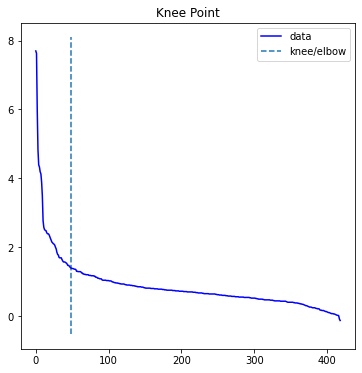

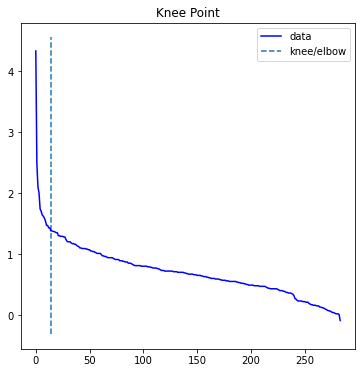

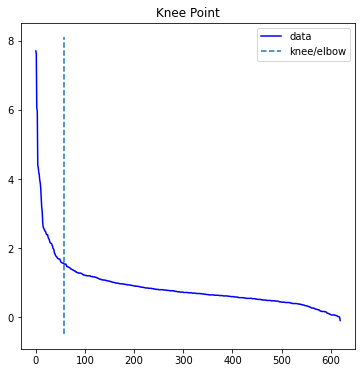

In [19]:
# ... filter using elbow method
print(f'Filtered by Elbow\n{"*"*23}')
for sample, entities_weight_count in entity_weights.items():
    sorted_weights = [weight for ent, weight, c in entities_weight_count]
    elbow_point = find_elbow(sorted_weights)
    disc_entities[f'{sample}'] = [ent for ent, weight, count in entity_weights[sample][:elbow_point]]
    print(f'  {sample}:\n{disc_entities[sample]}')

# ... manually find missing entities (italics > save only cols interest)
lm, lm0 = {}, {}
to_remove = {'too_general': ['object', 'ability', 'person', 'user', 'employment', 'continuant', 'member of an organization', 'information content entity','person with a disability'],
             'too_specific':  ['cause of death', 'advocate', 'suicide', 'style', 'person with a pedophilic disorder', 'exposure', 'identity', 'diversity']}
for sample in entity_weights.keys():
    lm0[sample] = [entity for entity in disc_entities[f'{sample}'] if entity not in to_remove['too_general']+to_remove['too_specific']]
for sample, lms in lm0.items():
    if sample == 'annotation':
        missed_sample = fp.copy()
    elif sample == 'model':
        missed_sample = fn.copy()
    elif sample == 'trues':
        missed_sample = true_sample.copy()
    missed_sample[sample] = missed_sample.apply(lambda row: list(set(str(row[f'{model_name}_pos_matches']).split(';')).intersection(set(lms))), axis=1)
    missed_sample[f'missed_{sample}'] = missed_sample[sample].apply(lambda matches: 1 if len(matches)==0 else 0)
    print(f'{sample}: {missed_sample.shape[0]} missed.')
    missed_sample.loc[missed_sample[f'missed_{sample}']==1].to_csv(os.path.join(models_folder, 'interpretations', 'entities_analysis',f'missed_{sample}.csv'), index=False)  
# entities in italics
to_add = {'annotation': ['hers', 'pussy', 'faggot', 'semen', 'bitch', 'partner'],
          'model': ['whore', 'faggot', 'fag', 'rapist', 'parent', 'sex worker', 'marital partner', 'cunt', 'she', 'penis', 'abortion', 'bimbo', 'slut', 'vagina', 'female gender role', 'hers', 'he', 'fuck', 'Mrs.', 'sexual abstinence', 'morphological enlargement', 'pussy', 'rainbow flag', 'bitch','domestic violence', 'rape', 'thot'],
          'trues': ['fag', 'pussy', 'hers', 'faggot', 'masculism', 'feminism', 'bitch', 'marital partner', 'sex worker', 'sex', 'partner', 'rape', 'menstruation', 'thot']}
# ... print Table 5
print(f'TABLE 5: \n{"*"*23}')
table_5 = {}
for sample, entities in lm0.items():
    lm[sample] = entities + [entity for entity,_,_ in entity_weights[sample] if entity in to_add[sample]]
    print('{}: {}'.format(sample, len(lm[sample])))
    table_5[sample] = ', '.join(lm[sample])
display(pd.DataFrame.from_dict(table_5, orient='index'))